###  ###############################################################################################################################################"

### AVEC DATA2 

###  Import des bibliothèques 
- **Manipulation de données** : numpy, pandas
- **Prétraitement** : sklearn (LabelEncoder et train_test_split)
- **Deep Learning** : TensorFlow/Keras
- **Visualisation** : matplotlib
- **Évaluation** : sklearn.metrics

In [191]:
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
import numpy as np
import json



from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt




import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")



TensorFlow version: 2.20.0



### Chargement et Exploration des Données

In [192]:

data2 = pd.read_excel('C:/Users/HP/Downloads/artificial_generator.xlsx')
data2

,X1,X2,Y
0,-0.354592,0.675646,neg
1,0.463945,0.681335,neg
2,0.001260,0.294081,pos
3,0.427305,0.592392,neg
4,-0.390878,0.823335,neg
...,...,...,...
1995,0.193988,0.538722,pos
1996,0.061337,0.997691,pos
1997,0.082539,0.155517,pos
1998,0.184205,0.556123,pos


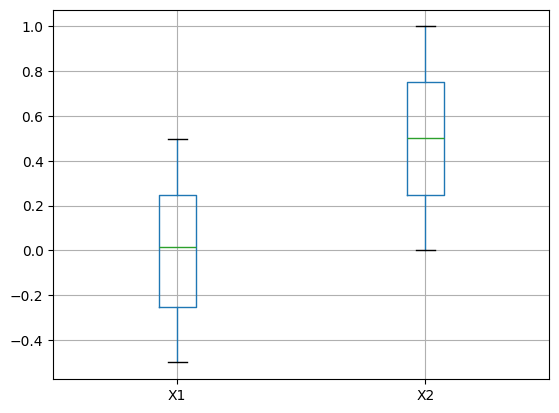

In [193]:
# Boxplot de  la distribution
data2[['X1', 'X2']].boxplot()
plt.show()

### Visualisation  Géométrique

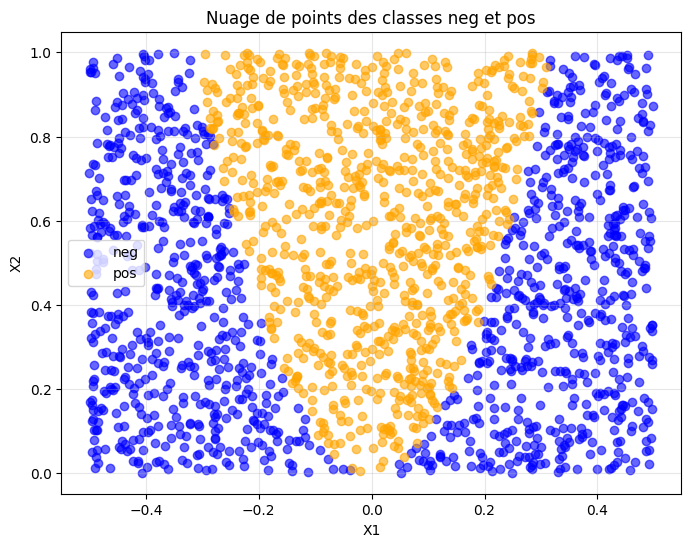

In [194]:
# Séparation des données par classe
neg_data = data2[data2['Y'] == 'neg']
pos_data = data2[data2['Y'] == 'pos']



# Tracage  
plt.figure(figsize=(8, 6))
plt.scatter(neg_data['X1'], neg_data['X2'], c='blue', label='neg', alpha=0.6)
plt.scatter(pos_data['X1'], pos_data['X2'], c='orange', label='pos', alpha=0.6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Nuage de points des classes neg et pos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

###  Préparation des Données

- **Extraction**
- **Encodage**
- **Séparation des données train/test**
- **taille du jeu d’entraînement**

In [195]:
def _():
    global X_train, X_test, y_train, y_test  
    
    X = data2[['X1', 'X2']].values
    y = data2['Y'].values
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

_()

print(f"X_train shape: {X_train.shape}")

X_train shape: (1600, 2)


### Construction du Modèle de Réseau de Neurones

  - Affichage de l’architecture du réseau, des dimensions des couches et du nombre total de paramètres que je peut entrainer 


In [196]:
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Input(shape=(2,)),  
    Dense(10, activation='sigmoid'),  
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

### Compilation 

In [197]:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision']  
)
print("Modele  bien compile")

Modele  bien compile


### Entrainement 

In [198]:

history = model.fit(
    X_train, y_train,           
    epochs=150,                  
    batch_size=10,              
    validation_data=(X_test, y_test),  
    verbose=1                   # mes details 
)

print("\n Entraînement terminé !")
print(f"Accuracy finale (train): {history.history['accuracy'][-1]:.4f}")
print(f"Accuracy finale (test): {history.history['val_accuracy'][-1]:.4f}")

Epoch 1/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5719 - loss: 0.7249 - precision: 0.0000e+00 - val_accuracy: 0.5650 - val_loss: 0.6917 - val_precision: 0.0000e+00
Epoch 2/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5719 - loss: 0.6801 - precision: 0.0000e+00 - val_accuracy: 0.5650 - val_loss: 0.6785 - val_precision: 0.0000e+00
Epoch 3/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5719 - loss: 0.6746 - precision: 0.0000e+00 - val_accuracy: 0.5650 - val_loss: 0.6753 - val_precision: 0.0000e+00
Epoch 4/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5719 - loss: 0.6725 - precision: 0.0000e+00 - val_accuracy: 0.5650 - val_loss: 0.6733 - val_precision: 0.0000e+00
Epoch 5/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5719 - loss: 0.6708 - precision: 0.0000e+00 - val_accuracy: 0.5650 - val_loss: 0.6717 - val_precision: 0.0000e+00
Epoch 6/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5719 - loss: 0.6689 - precis

### Visualisation des statistiques de l'apprentissage 

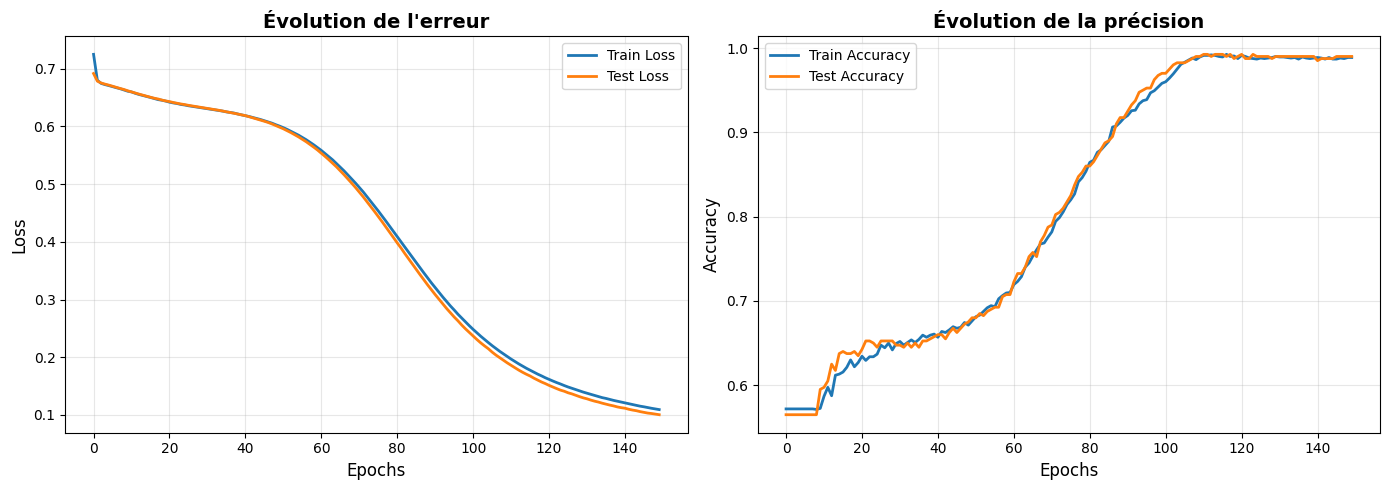

 Statistiques finales :
Train - Loss: 0.1094, Accuracy: 0.9887
Test  - Loss: 0.1005, Accuracy: 0.9900


In [199]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1 : Loss 
axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Test Loss', linewidth=2)
axes[0].set_xlabel('Epochs', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Évolution de l\'erreur', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Graphique 2 : Accuracy 
axes[1].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Test Accuracy', linewidth=2)
axes[1].set_xlabel('Epochs', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Évolution de la précision', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Statistiques finales :")
print(f"Train - Loss: {history.history['loss'][-1]:.4f}, Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Test  - Loss: {history.history['val_loss'][-1]:.4f}, Accuracy: {history.history['val_accuracy'][-1]:.4f}")

### je fais une prediction manuellement 

In [200]:
# Créer de  nouveaux points à tester
nouveaux_points = np.array([
    [0.0, 0.5],    # Centre  doit  être positif 
    [-0.4, 0.9],   # # En   haut à gauche doit  être negatif 
    [0.4, 0.1],    # # En  bas à droite doit  être negatif 
    [0.1, 0.6],    # Centre  doit  être positif 
])

#  prédictions
predictions = model.predict(nouveaux_points)

# résultats
print(" Predictions les  nouveaux points :\n")

for i, point in enumerate(nouveaux_points):
    pred_prob = predictions[i][0]
    pred_class = "pos" if pred_prob > 0.5 else "neg"
    confidence = pred_prob if pred_prob > 0.5 else 1 - pred_prob
    
    attendu = ["pos", "neg", "neg", "pos"][i]
    correct = "vrai" if pred_class == attendu else "faux"
    
    print(f"Point ({point[0]:5.2f}, {point[1]:5.2f}) → {pred_class} (confiance: {confidence*100:.1f}%) {correct}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
 Predictions les  nouveaux points :

Point ( 0.00,  0.50) → pos (confiance: 98.8%) vrai
Point (-0.40,  0.90) → neg (confiance: 96.4%) vrai
Point ( 0.40,  0.10) → neg (confiance: 99.9%) vrai
Point ( 0.10,  0.60) → pos (confiance: 98.2%) vrai


### evaluation du model su rl'ensemble du test (400)

In [201]:
# Éval du model sur les données de test
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {score[1]*100:.2f}%")

Test accuracy: 99.00%


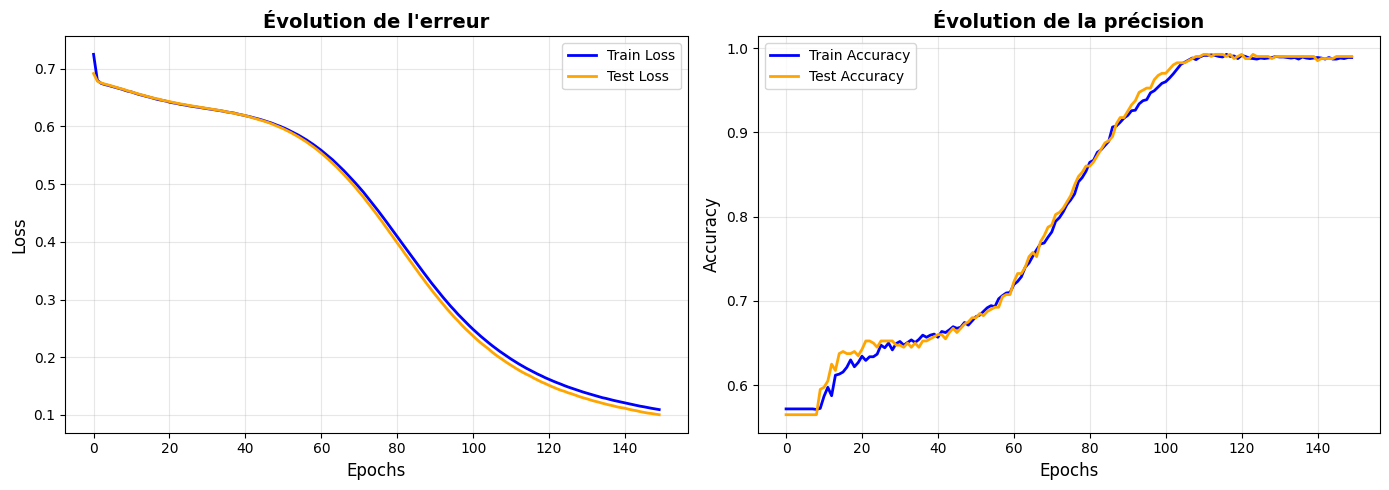

In [202]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss
axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2, color='blue')
axes[0].plot(history.history['val_loss'], label='Test Loss', linewidth=2, color='orange')
axes[0].set_xlabel('Epochs', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Évolution de l\'erreur', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy
axes[1].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2, color='blue')
axes[1].plot(history.history['val_accuracy'], label='Test Accuracy', linewidth=2, color='orange')
axes[1].set_xlabel('Epochs', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Évolution de la précision', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [203]:
history.history.keys()
pd.DataFrame(history.history)

,accuracy,loss,precision,val_accuracy,val_loss,val_precision
0,0.571875,0.724924,0.000000,0.565,0.691709,0.000000
1,0.571875,0.680060,0.000000,0.565,0.678471,0.000000
2,0.571875,0.674573,0.000000,0.565,0.675308,0.000000
3,0.571875,0.672504,0.000000,0.565,0.673323,0.000000
4,0.571875,0.670836,0.000000,0.565,0.671660,0.000000
...,...,...,...,...,...,...
145,0.986875,0.114153,0.972934,0.990,0.104496,0.988506
146,0.988125,0.112848,0.975714,0.990,0.103297,0.988506
147,0.987500,0.111585,0.974322,0.990,0.102548,0.988506
148,0.988750,0.110531,0.975749,0.990,0.101480,0.988506


In [204]:
model.get_weights()

[array([[10.840961 , -8.166298 ,  6.2251515,  8.948767 ,  1.6365683,
         -9.513618 , 12.175939 ,  6.345908 , -9.230408 ,  8.172157 ],
        [-1.9483653,  1.5336044, -1.3214384, -2.0293906, -2.1891003,
         -1.5753709,  2.1405249, -1.5608317, -1.8750705,  1.7626603]],
       dtype=float32),
 array([-1.4757385,  1.2241958, -1.0490682, -1.0891029, -0.1829873,
        -1.3969024,  1.6098121, -0.9359806, -1.1823058,  1.0591011],
       dtype=float32),
 array([[-6.2950583],
        [ 1.8528271],
        [-1.6529074],
        [-4.602568 ],
        [-0.7975768],
        [-4.7044783],
        [ 4.1550956],
        [-1.9440836],
        [-4.710246 ],
        [ 1.5886605]], dtype=float32),
 array([0.24050935], dtype=float32)]

In [205]:
model.get_config()


{'name': 'sequential_26',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_layer_26',
    'optional': False},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_52',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 10,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {}

In [206]:
# Voir le résumé du modèle
model.summary()



Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125 (504.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84 (340.00 B)

### Visualisation des frontieres de decisions 

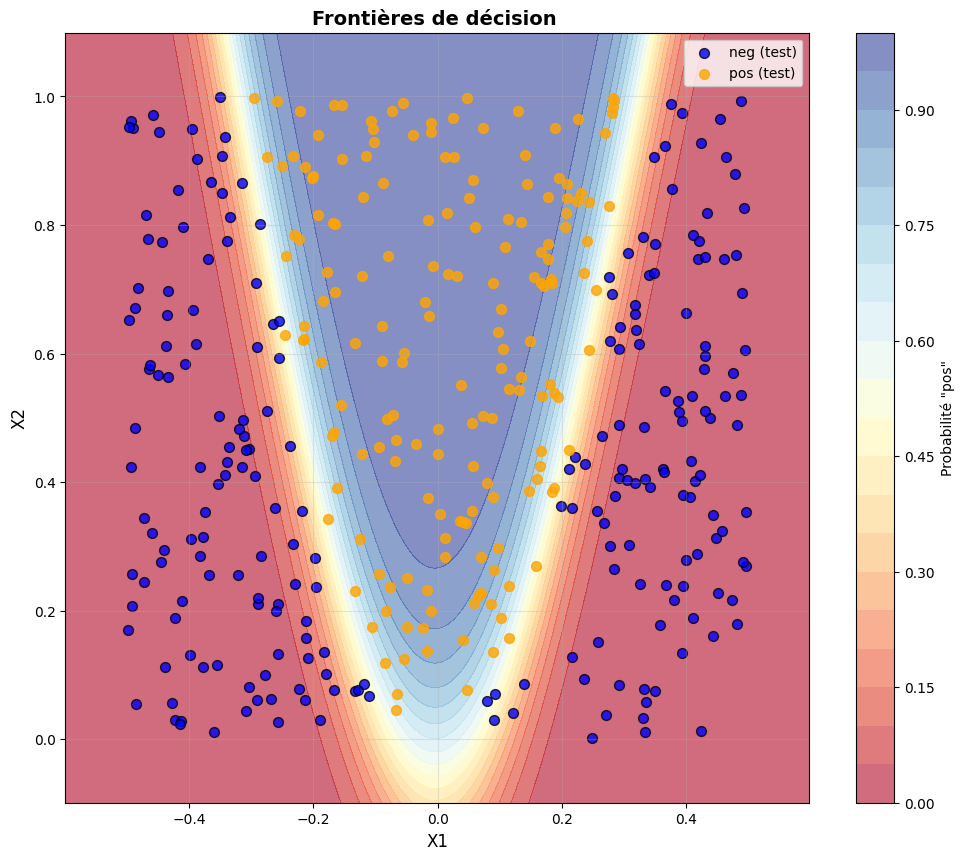

In [207]:
import numpy as np
import matplotlib.pyplot as plt


X = data2[['X1', 'X2']].values
y = data2['Y'].values


# grille
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))



# Prédiction de chaque chaque point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
Z = Z.reshape(xx.shape)



plt.figure(figsize=(12, 10))
plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu', alpha=0.6)
plt.colorbar(label='Probabilité "pos"')






# Points de test
neg_test = X_test[y_test == 0]
pos_test = X_test[y_test == 1]

plt.scatter(neg_test[:, 0], neg_test[:, 1], c='blue', edgecolors='black', 
            s=50, label='neg (test)', alpha=0.8)
plt.scatter(pos_test[:, 0], pos_test[:, 1], c='orange',  
            s=50, label='pos (test)', alpha=0.8)

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title(f'Frontières de décision ', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### visualisation de la matrice de confusion 


 Matrice de confusion :
[[224   2]
 [  2 172]]

 Détails :
Vrais négatifs   : 224 
Faux positifs : 2 
Faux négatifs    : 2 
Vrais positifs   : 172 

 Total correct : 396/400 = 99.00%


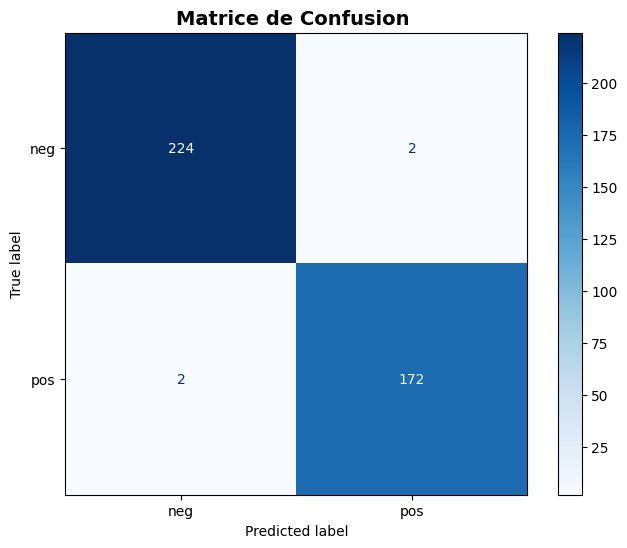

In [208]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Creer again des predictions 

y_pred_proba = model.predict(X_test, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()



 #Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

print("\n Matrice de confusion :")
print(cm)
print("\n Détails :")
print(f"Vrais négatifs   : {cm[0, 0]} ")
print(f"Faux positifs : {cm[0, 1]} ")
print(f"Faux négatifs    : {cm[1, 0]} ")
print(f"Vrais positifs   : {cm[1, 1]} ")
print(f"\n Total correct : {cm[0, 0] + cm[1, 1]}/{len(y_test)} = {((cm[0, 0] + cm[1, 1])/len(y_test))*100:.2f}%")






#Visualisation
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neg', 'pos'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Matrice de Confusion ', fontsize=14, fontweight='bold')
plt.show()



### Visualisation de la comparaison REALITE et PREDICTION 

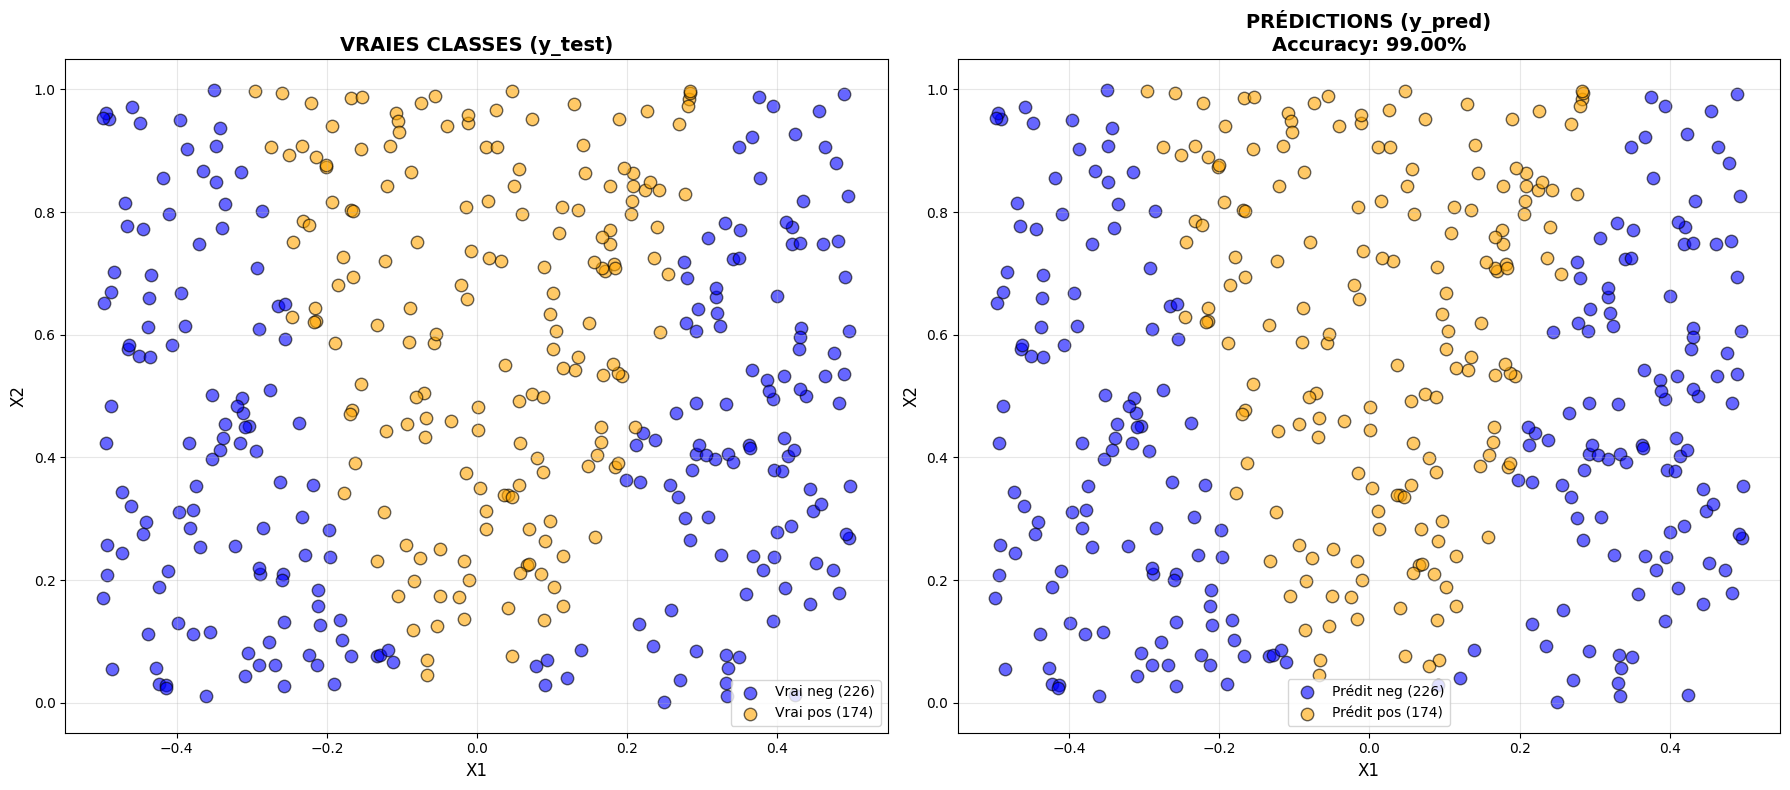

In [209]:
import matplotlib.pyplot as plt
import numpy as np

# S'assurer que y_pred existe
if 'y_pred' not in locals():
    y_pred_proba = model.predict(X_test, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Verité 
neg_true = X_test[y_test == 0]
pos_true = X_test[y_test == 1]

axes[0].scatter(neg_true[:, 0], neg_true[:, 1], 
                c='blue', s=80, alpha=0.6, edgecolors='black', linewidth=1,
                label=f'Vrai neg ({len(neg_true)})')
axes[0].scatter(pos_true[:, 0], pos_true[:, 1], 
                c='orange', s=80, alpha=0.6, edgecolors='black', linewidth=1,
                label=f'Vrai pos ({len(pos_true)})')
axes[0].set_xlabel('X1', fontsize=12)
axes[0].set_ylabel('X2', fontsize=12)
axes[0].set_title('VRAIES CLASSES (y_test)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

#  prédiction 
neg_pred = X_test[y_pred == 0]
pos_pred = X_test[y_pred == 1]

axes[1].scatter(neg_pred[:, 0], neg_pred[:, 1], 
                c='blue', s=80, alpha=0.6, edgecolors='black', linewidth=1,
                label=f'Prédit neg ({len(neg_pred)})')
axes[1].scatter(pos_pred[:, 0], pos_pred[:, 1], 
                c='orange', s=80, alpha=0.6, edgecolors='black', linewidth=1,
                label=f'Prédit pos ({len(pos_pred)})')
axes[1].set_xlabel('X1', fontsize=12)
axes[1].set_ylabel('X2', fontsize=12)
axes[1].set_title('PRÉDICTIONS (y_pred)\nAccuracy: 99.00%', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



### #########################################################################################################""

### Avec DATA 4 

#### Chargement 

In [210]:
data4 = pd.read_excel('C:/Users/HP/Downloads/artificial_generator.xlsx', sheet_name = 1)
data4

,X1,X2,Y
0,-0.354592,0.675646,pos
1,0.463945,0.681335,neg
2,0.001260,0.294081,pos
3,0.427305,0.592392,neg
4,-0.390878,0.823335,pos
...,...,...,...
1995,0.193988,0.538722,pos
1996,0.061337,0.997691,neg
1997,0.082539,0.155517,pos
1998,0.184205,0.556123,pos


In [211]:
print(data4.describe())

                X1           X2
count  2000.000000  2000.000000
mean      0.002400     0.499475
std       0.288482     0.288794
min      -0.499802     0.001004
25%      -0.250818     0.249478
50%       0.017055     0.500533
75%       0.247145     0.750122
max       0.498620     0.999143


### NUAGE de points 

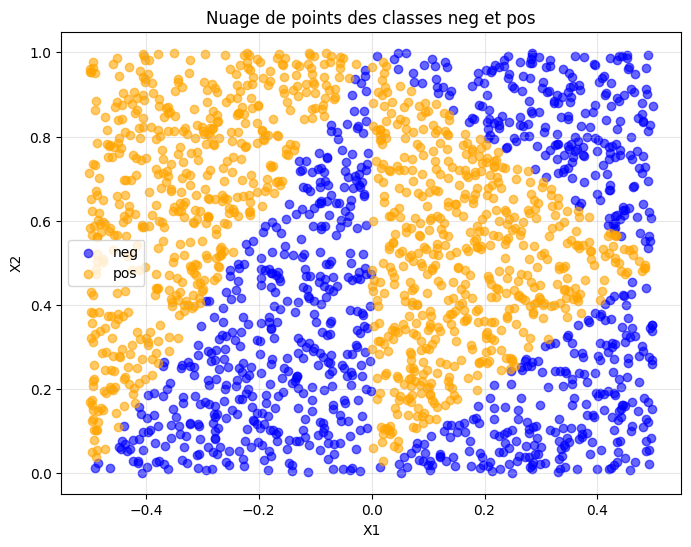

Y
pos    1071
neg     929
Name: count, dtype: int64

Pourcentage 'pos': 53.55%
Pourcentage 'neg': 46.45%


In [ ]:
# Separation des données par classe
neg_data = data4[data4['Y'] == 'neg']
pos_data = data4[data4['Y'] == 'pos']



# Tracage  
plt.figure(figsize=(8, 6))
plt.scatter(neg_data['X1'], neg_data['X2'], c='blue', label='neg', alpha=0.6)
plt.scatter(pos_data['X1'], pos_data['X2'], c='orange', label='pos', alpha=0.6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Nuage de points des classes neg et pos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Statistiques 
print(data4['Y'].value_counts())
print(f"\nPourcentage 'pos': {(data4['Y']=='pos').sum()/len(data4)*100:.2f}%")
print(f"Pourcentage 'neg': {(data4['Y']=='neg').sum()/len(data4)*100:.2f}%")



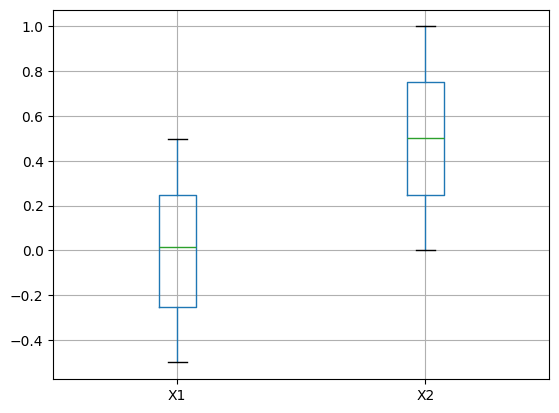

X1 - Min: -0.500, Max: 0.499, Médiane: 0.017
X2 - Min: 0.001, Max: 0.999, Médiane: 0.501


In [213]:
# Boxplot 

data2[['X1', 'X2']].boxplot()
plt.show()


print(f"X1 - Min: {data4['X1'].min():.3f}, Max: {data4['X1'].max():.3f}, Médiane: {data4['X1'].median():.3f}")
print(f"X2 - Min: {data4['X2'].min():.3f}, Max: {data4['X2'].max():.3f}, Médiane: {data4['X2'].median():.3f}")


### preparation 

In [218]:
# Séparation des donnee
X = data4[['X1', 'X2']].values 
y = data4['Y'].values          




# Encodage 
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# Split train/test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2,      
    random_state=42,    
    stratify=y_encoded  # la même proportion de classes
)

print("\n Split train/test :")
print(f"X_train: {X_train.shape} - {len(X_train)} exemples pour entraîner")
print(f"X_test:  {X_test.shape} - {len(X_test)} exemples pour tester")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")




 Split train/test :
X_train: (1600, 2) - 1600 exemples pour entraîner
X_test:  (400, 2) - 400 exemples pour tester
y_train: (1600,)
y_test:  (400,)


### Construction du modèle 

In [223]:

from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Input(shape=(2,)),                    
    
    # 1st couche 
    Dense(20, activation='relu', name='couche_cachee_1'),
    Dropout(0.2, name='dropout_1'),      
    
    # 2nd couche cachée 
    Dense(10, activation='relu', name='couche_cachee_2'),
    
    # sortie 
    Dense(1, activation='sigmoid', name='couche_sortie')
])






In [224]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ couche_cachee_1 (Dense)         │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ couche_cachee_2 (Dense)         │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ couche_sortie (Dense)           │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

### Compilation 


In [ ]:

model.compile(
    optimizer='adam',                        
    loss='binary_crossentropy',              
    metrics=['accuracy', 'precision']        
)


###  ENTRAINEMENT 

In [232]:



history = model.fit(
    X_train, y_train,                     
    epochs=250,                           
    batch_size=10,                         
    validation_data=(X_test, y_test),      
    verbose=1                              
)



Epoch 1/250
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9787 - loss: 0.0630 - precision: 0.9905 - val_accuracy: 0.9925 - val_loss: 0.0238 - val_precision: 1.0000
Epoch 2/250
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - loss: 0.0780 - precision: 0.9787 - val_accuracy: 0.9975 - val_loss: 0.0219 - val_precision: 1.0000
Epoch 3/250
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9694 - loss: 0.0792 - precision: 0.9798 - val_accuracy: 0.9950 - val_loss: 0.0237 - val_precision: 0.9907
Epoch 4/250
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9725 - loss: 0.0766 - precision: 0.9834 - val_accuracy: 0.9950 - val_loss: 0.0200 - val_precision: 0.9953
Epoch 5/250
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9712 - loss: 0.0685 - precision: 0.9845 - val_accuracy: 0.9950 - val_loss: 0.0209 - val_precision: 0.9907
Epoch 6/250
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9775 - loss: 0.0740 - precision: 0.9870 - val_accuracy: 0.9925 - val

In [264]:
# Extraction des résultats 
final_train_acc = history.history['accuracy'][-1]
final_test_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_test_loss = history.history['val_loss'][-1]
final_train_prec = history.history['precision'][-1]
final_test_prec = history.history['val_precision'][-1]

# résultats finaux
print("\n Résultats :")
print("=" * 70)
print(f"{'Métrique':<25} {'Train':<15} {'Test':<15} {'Différence'}")
print("-" * 70)
print(f"{'Accuracy':<25} {final_train_acc*100:>6.2f}%{'':<8} {final_test_acc*100:>6.2f}%{'':<8} {abs(final_train_acc-final_test_acc)*100:>5.2f}%")
print(f"{'Loss':<25} {final_train_loss:>6.4f}{'':<8} {final_test_loss:>6.4f}{'':<8} {abs(final_train_loss-final_test_loss):>5.4f}")
print(f"{'Precision':<25} {final_train_prec*100:>6.2f}%{'':<8} {final_test_prec*100:>6.2f}%{'':<8} {abs(final_train_prec-final_test_prec)*100:>5.2f}%")
print("=" * 70)




 Résultats :
Métrique                  Train           Test            Différence
----------------------------------------------------------------------
Accuracy                   98.25%          99.75%          1.50%
Loss                      0.0678         0.0184         0.0495
Precision                  98.82%          99.53%          0.71%


### visualisation des courbes d'apprentissage 

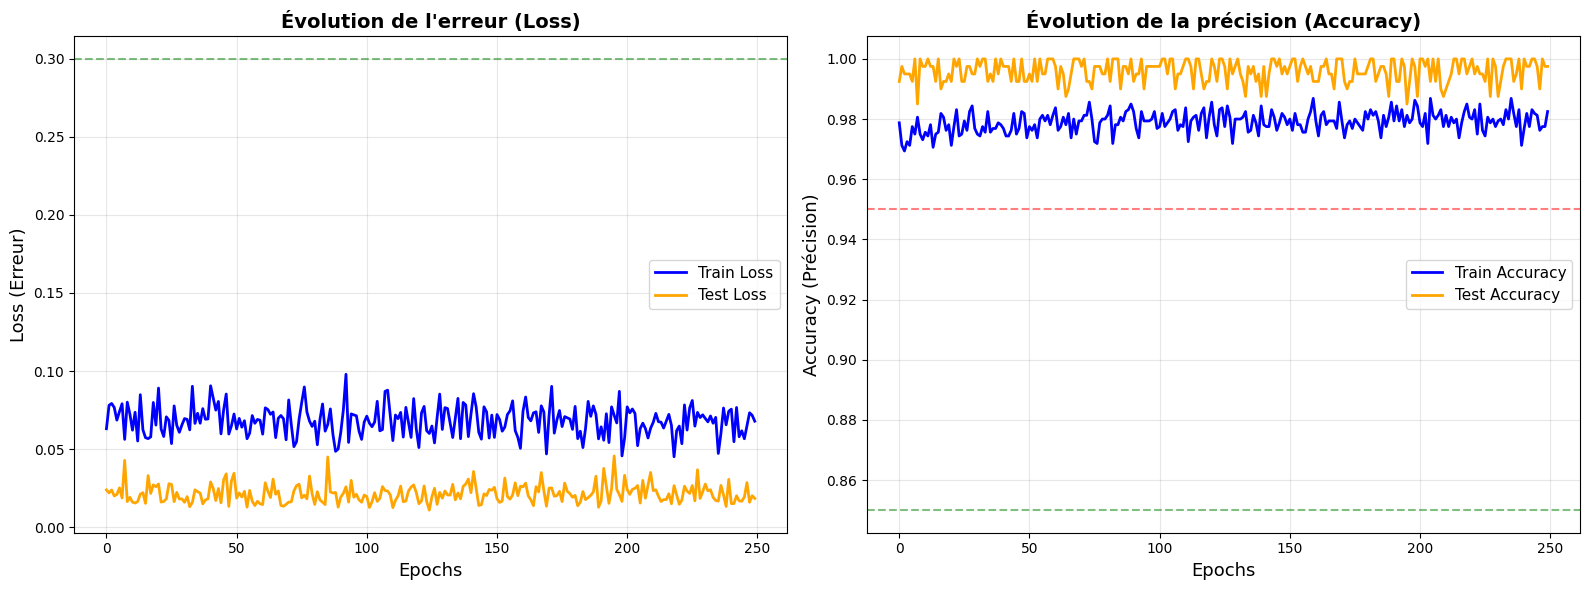

In [235]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1 : Loss
axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2, color='blue')
axes[0].plot(history.history['val_loss'], label='Test Loss', linewidth=2, color='orange')
axes[0].set_xlabel('Epochs', fontsize=13)
axes[0].set_ylabel('Loss (Erreur)', fontsize=13)
axes[0].set_title('Évolution de l\'erreur (Loss)', 
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0.3, color='green', linestyle='--', alpha=0.5, label='Seuil excellent (<0.3)')

# Graphique 2 : Accuracy 
axes[1].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2, color='blue')
axes[1].plot(history.history['val_accuracy'], label='Test Accuracy', linewidth=2, color='orange')
axes[1].set_xlabel('Epochs', fontsize=13)
axes[1].set_ylabel('Accuracy (Précision)', fontsize=13)
axes[1].set_title('Évolution de la précision (Accuracy)', 
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0.85, color='green', linestyle='--', alpha=0.5, label='Objectif (>85%)')
axes[1].axhline(y=0.95, color='red', linestyle='--', alpha=0.5, label='Excellent (>95%)')

plt.tight_layout()
plt.show()



In [238]:
# Analyse 
loss_start = history.history['loss'][0]
loss_end = history.history['loss'][-1]
loss_reduction = (loss_start - loss_end) / loss_start * 100

acc_start = history.history['accuracy'][0]
acc_end = history.history['accuracy'][-1]
acc_gain = (acc_end - acc_start) * 100

print("\n Analyse des courbes d'apprentissage :") 


print(f" Loss :")
print(f"  • Epoch 1   : {loss_start:.4f}")
print(f"  • Epoch 250 : {loss_end:.4f}")
print(f"  • Réduction : {loss_reduction:.1f}%")
if loss_reduction > 60:
    print(f"   Bonne réduction de l'erreur")

print(f"\n Accuracy :")
print(f"  • Epoch 1   : {acc_start*100:.2f}%")
print(f"  • Epoch 250 : {acc_end*100:.2f}%")
print(f"  • Gain      : +{acc_gain:.2f} points")
if acc_gain > 30:
    print(f"   Bon apprentissage")

# Vitesse de convergence
    #  l'epoch où on atteint presque la precision finale
target_acc = acc_start + 0.8 * (acc_end - acc_start)
epochs_to_80 = next((i for i, acc in enumerate(history.history['accuracy']) if acc >= target_acc), 250)

print(f"\n Vitesse de convergence :")
print(f"  • Epochs pour atteindre 80% du progrès : {epochs_to_80}")





 Analyse des courbes d'apprentissage :
 Loss :
  • Epoch 1   : 0.0630
  • Epoch 250 : 0.0678
  • Réduction : -7.6%

 Accuracy :
  • Epoch 1   : 97.87%
  • Epoch 250 : 98.25%
  • Gain      : +0.38 points

 Vitesse de convergence :
  • Epochs pour atteindre 80% du progrès : 16


### Prediction sur de nouveaux points 

In [ ]:

nouveaux_points = np.array([
    # Coins
    [-0.4, 0.9],   #  haut-gauche
    [0.4, 0.9],    # haut-droit
    [-0.4, 0.1],   # bas-gauche
    [0.4, 0.1],    # bas-droit
    
    # Centre et zones intermediaires
    [0.0, 0.5],    # Centre
    [-0.2, 0.7],   # zone intermédiaire gauche-haut
    [0.2, 0.3],    # zone intermédiaire droite-bas
    
    # Zones de transition 
    [0.0, 0.8],    # Transition haut
    [0.0, 0.2],    # Transition bas
])

#  reponses attendues 

attendu_estimate = ["neg", "pos", "pos", "neg", "neg", "pos", "neg", "je ne sais pas ", "je ne sais pas "]

# prédictions
predictions = model.predict(nouveaux_points, verbose=0)

#  résultats
print(" Prédictions  :")

print(f"{'Point (X1, X2)':<20} {'Probabilité':<15} {'Prédiction':<12} {'Confiance':<12} {'Attendu (est.)'}")


for i, point in enumerate(nouveaux_points):
    pred_prob = predictions[i][0]
    pred_class = "pos" if pred_prob > 0.5 else "neg"
    confidence = pred_prob if pred_prob > 0.5 else 1 - pred_prob
    expected = attendu_estimate[i]
    
    point_str = f"({point[0]:5.2f}, {point[1]:5.2f})"
    prob_str = f"{pred_prob:.4f}"
    conf_str = f"{confidence*100:.1f}%"
    
    # Indic de confiance
    if confidence > 0.85:
        conf_indicator = " Haute"
    elif confidence > 0.70:
        conf_indicator = " Moyenne"
    else:
        conf_indicator = " Basse"
    
    print(f"{point_str:<20} {prob_str:<15} {pred_class:<12} {conf_str:<12} {expected:<15}")
    if i in [0, 3, 6]:  
        print()





 Prédictions  :
Point (X1, X2)       Probabilité     Prédiction   Confiance    Attendu (est.)
(-0.40,  0.90)       1.0000          pos          100.0%       neg            

( 0.40,  0.90)       0.0000          neg          100.0%       pos            
(-0.40,  0.10)       0.0024          neg          99.8%        pos            
( 0.40,  0.10)       0.0000          neg          100.0%       neg            

( 0.00,  0.50)       0.8499          pos          85.0%        neg            
(-0.20,  0.70)       1.0000          pos          100.0%       pos            
( 0.20,  0.30)       0.9924          pos          99.2%        neg            

( 0.00,  0.80)       0.9435          pos          94.4%        je ne sais pas 
( 0.00,  0.20)       0.6576          pos          65.8%        je ne sais pas 


Je me fie à l'indicateur de confiance 

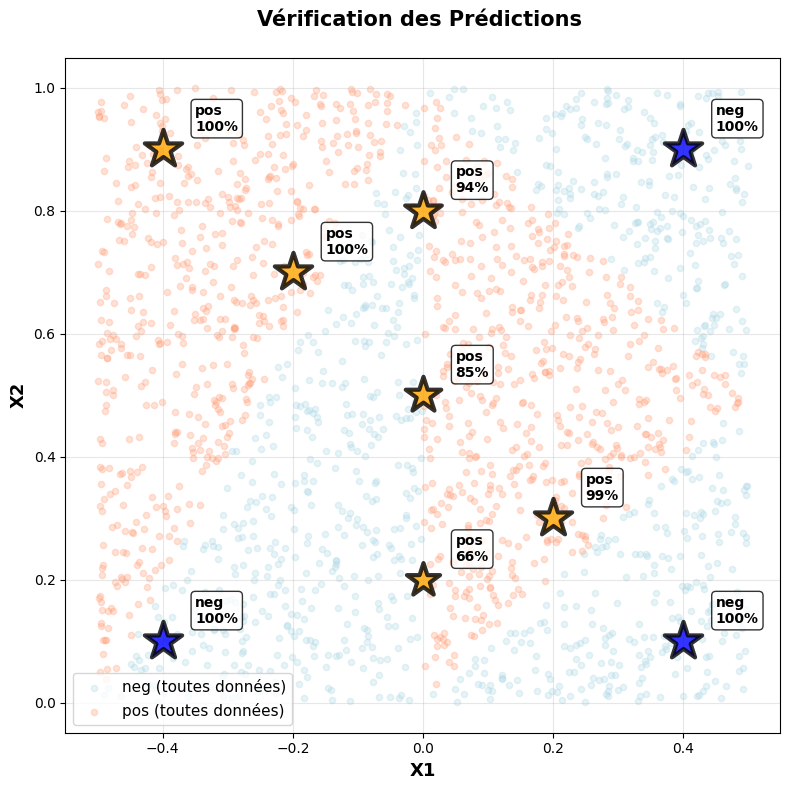

In [249]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 8))

# Afficher TOUTES les données (fond)
plt.scatter(neg_data['X1'], neg_data['X2'], c='lightblue', 
            label='neg (toutes données)', alpha=0.3, s=20)
plt.scatter(pos_data['X1'], pos_data['X2'], c='lightsalmon', 
            label='pos (toutes données)', alpha=0.3, s=20)

# Superposer nosS 9 POINTS DE TEST
for i, point in enumerate(nouveaux_points):
    pred_prob = predictions[i][0]
    pred_class = "pos" if pred_prob > 0.5 else "neg"
    confidence = pred_prob if pred_prob > 0.5 else 1 - pred_prob
    
    # Couleur selon prédiction
    color = 'orange' if pred_class == 'pos' else 'blue'
    
    # Taille selon confiance
    size = 300 + (confidence * 500) 
    
    plt.scatter(point[0], point[1], c=color, s=size, 
                edgecolors='black', linewidth=3, 
                marker='*', zorder=10, alpha=0.8)
    
    # Étiquette avec confiance
    plt.text(point[0] + 0.05, point[1] + 0.03, 
             f"{pred_class}\n{confidence*100:.0f}%",
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.xlabel('X1', fontsize=13, fontweight='bold')
plt.ylabel('X2', fontsize=13, fontweight='bold')
plt.title('Vérification des Prédictions \n', 
          fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [250]:
# Évaluation complète
score = model.evaluate(X_test, y_test, verbose=0)


print(f"Test Accuracy  : {score[1]*100:.2f}%")
print(f"Test Loss      : {score[0]:.4f}")
print(f"Test Precision : {score[2]*100:.2f}%")


n_correct = int(score[1] * len(X_test))
n_errors = len(X_test) - n_correct

print(f"\n Prédictions correctes : {n_correct}/{len(X_test)}")
print(f" Erreurs              : {n_errors}/{len(X_test)}")

if score[1] > 0.92:
    print("\n PERFORMANCE PARFAITE !")
    
elif score[1] > 0.85:
    print("\n EXCELLENTE PERFORMANCE ")
   
elif score[1] > 0.75:
    print("\n BONNE PERFORMANCE ")
   
else:
    print("\n Performance FAIBLE")
   

Test Accuracy  : 99.75%
Test Loss      : 0.0184
Test Precision : 99.53%

 Prédictions correctes : 399/400
 Erreurs              : 1/400

 PERFORMANCE PARFAITE !


### Matrice de confusion 

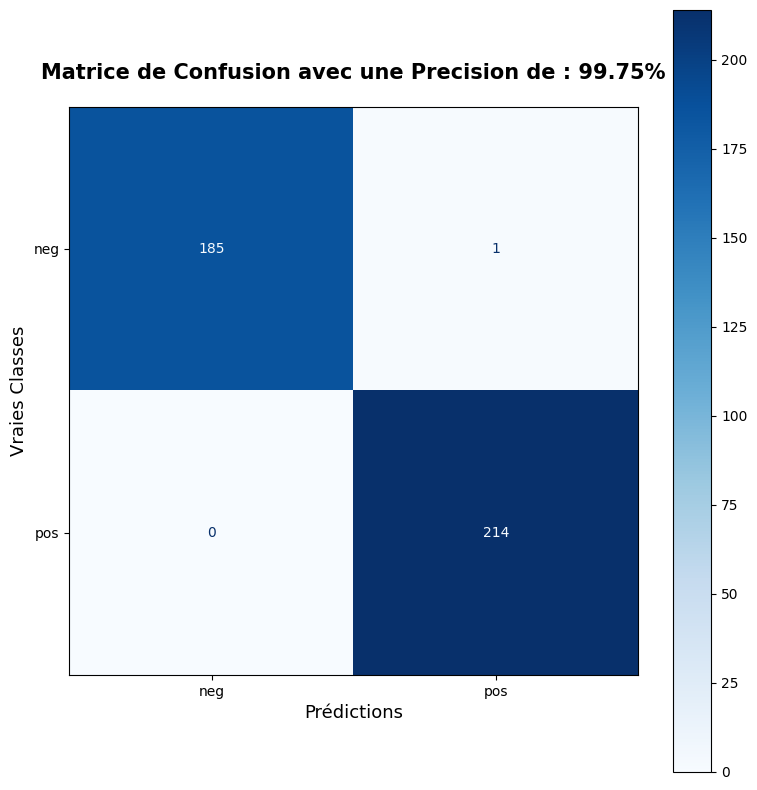

In [254]:
# prédictions
y_pred_proba = model.predict(X_test, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()


cm = confusion_matrix(y_test, y_pred)


fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neg', 'pos'])
disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=True)
plt.title(f'Matrice de Confusion avec une Precision de : {final_test_acc*100:.2f}%', 
          fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Prédictions', fontsize=13)
plt.ylabel('Vraies Classes', fontsize=13)
plt.tight_layout()
plt.show()



In [255]:
# Statistiques détaillées
TN, FP, FN, TP = cm.ravel()

print("\n Détails de la matrice :")

print(f"  • Vrais Négatifs   : {TN:3d}  (neg correctement identifiés)")
print(f"  • Faux Positifs    : {FP:3d}  (neg classés comme pos)")
print(f"  • Faux Négatifs    : {FN:3d}  (pos classés comme neg)")
print(f"  • Vrais Positifs   : {TP:3d} (pos correctement identifiés)")


# Métriques
accuracy = (TN + TP) / (TN + FP + FN + TP)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\n Métriques détaillées :")

print(f"  • Accuracy  : {accuracy*100:.2f}%")
print(f"  • Precision : {precision*100:.2f}%")
print(f"  • Recall    : {recall*100:.2f}%")
print(f"  • F1-Score  : {f1_score*100:.2f}%")


print(f"\n Total correct : {TN + TP}/{len(y_test)} = {accuracy*100:.2f}%")
print(f" Total erreurs : {FP + FN}/{len(y_test)} = {(1-accuracy)*100:.2f}%")




 Détails de la matrice :
  • Vrais Négatifs   : 185  (neg correctement identifiés)
  • Faux Positifs    :   1  (neg classés comme pos)
  • Faux Négatifs    :   0  (pos classés comme neg)
  • Vrais Positifs   : 214 (pos correctement identifiés)

 Métriques détaillées :
  • Accuracy  : 99.75%
  • Precision : 99.53%
  • Recall    : 100.00%
  • F1-Score  : 99.77%

 Total correct : 399/400 = 99.75%
 Total erreurs : 1/400 = 0.25%


### Frontiere de decision 

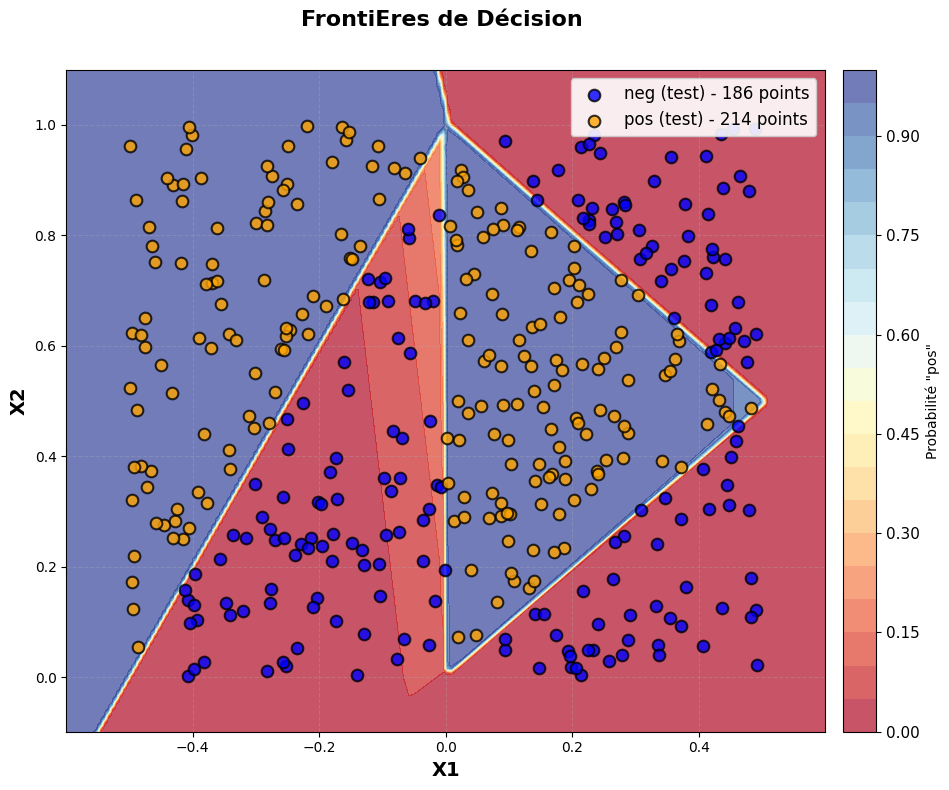

In [258]:
#  grille de points
from platform import architecture


x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))



# Prediction  pour chaque point (40milles points)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
Z = Z.reshape(xx.shape)

# Créer la visualisation
plt.figure(figsize=(10, 8))


contour = plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu', alpha=0.7)
cbar = plt.colorbar(contour, label='Probabilité "pos"', pad=0.02)
cbar.ax.tick_params(labelsize=11)

# Points de test
neg_test = X_test[y_test == 0]
pos_test = X_test[y_test == 1]

plt.scatter(neg_test[:, 0], neg_test[:, 1], c='blue', edgecolors='black', 
            s=70, label=f'neg (test) - {len(neg_test)} points', alpha=0.8, linewidth=1.5, zorder=5)
plt.scatter(pos_test[:, 0], pos_test[:, 1], c='orange', edgecolors='black', 
            s=70, label=f'pos (test) - {len(pos_test)} points', alpha=0.8, linewidth=1.5, zorder=5)

plt.xlabel('X1', fontsize=14, fontweight='bold')
plt.ylabel('X2', fontsize=14, fontweight='bold')
plt.title(f'FrontiEres de Décision \n'
          , 
          fontsize=16, fontweight='bold', pad=15)
plt.legend(fontsize=12, loc='upper right', framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()



### Comparaison 

 Prédictions correctes : 399/400 (99.75%)
 Erreurs              : 1/400 (0.25%)


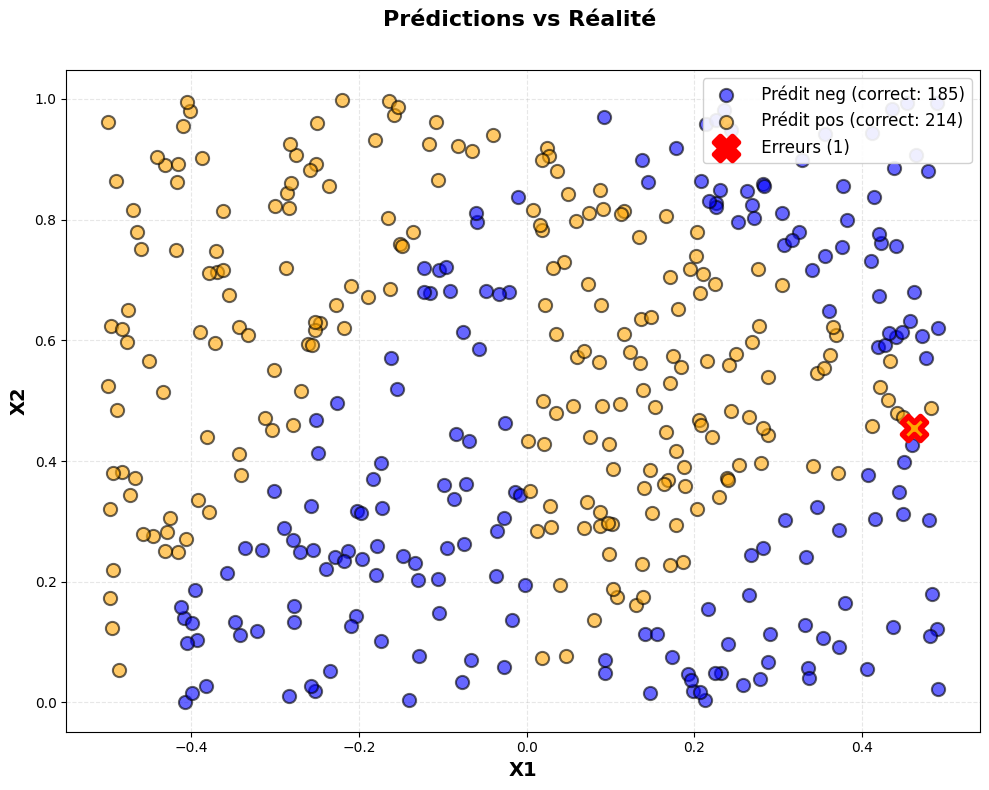

In [260]:
# Identifier bonnes et mauvaises prédictions
correct_mask = (y_pred == y_test)
incorrect_mask = ~correct_mask

X_correct = X_test[correct_mask]
y_pred_correct = y_pred[correct_mask]

X_incorrect = X_test[incorrect_mask]
y_pred_incorrect = y_pred[incorrect_mask]
y_test_incorrect = y_test[incorrect_mask]

n_correct = len(X_correct)
n_incorrect = len(X_incorrect)


print(f" Prédictions correctes : {n_correct}/{len(X_test)} ({(n_correct/len(X_test))*100:.2f}%)")
print(f" Erreurs              : {n_incorrect}/{len(X_test)} ({(n_incorrect/len(X_test))*100:.2f}%)")

# Visualisation
plt.figure(figsize=(10, 8))

# Points corrects
neg_correct = X_correct[y_pred_correct == 0]
pos_correct = X_correct[y_pred_correct == 1]

plt.scatter(neg_correct[:, 0], neg_correct[:, 1], 
            c='blue', s=90, alpha=0.6, edgecolors='black', linewidth=1.5,
            label=f' Prédit neg (correct: {len(neg_correct)})', marker='o', zorder=3)

plt.scatter(pos_correct[:, 0], pos_correct[:, 1], 
            c='orange', s=90, alpha=0.6, edgecolors='black', linewidth=1.5,
            label=f' Prédit pos (correct: {len(pos_correct)})', marker='o', zorder=3)

# Points incorrects 
if len(X_incorrect) > 0:
    for i in range(len(X_incorrect)):
        color = 'orange' if y_pred_incorrect[i] == 1 else 'blue'
        plt.scatter(X_incorrect[i, 0], X_incorrect[i, 1], 
                    c=color, s=300, alpha=1.0, edgecolors='red', linewidth=4,
                    marker='X', zorder=5)
    
    plt.scatter([], [], c='red', s=300, marker='X', edgecolors='red', linewidth=4,
                label=f' Erreurs ({len(X_incorrect)})', zorder=5)

plt.xlabel('X1', fontsize=14, fontweight='bold')
plt.ylabel('X2', fontsize=14, fontweight='bold')
plt.title(f'Prédictions vs Réalité \n'
          , 
          fontsize=16, fontweight='bold', pad=15)
plt.legend(fontsize=12, loc='upper right', framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()



In [263]:
model.get_weights()

[array([[-1.4339026e+00, -6.2461448e-01,  1.2607704e+00,  1.2954330e+00,
          1.5686065e-01, -1.3330576e+00,  5.8893743e+00, -8.2758152e-01,
          1.1886146e+00,  7.1524006e-01,  7.4817228e-01, -8.7853020e-01,
         -9.2274046e-01,  6.3251600e-02, -3.0231476e-04,  7.3176613e+00,
          7.5071615e-01, -1.3621782e+00, -4.7125649e-01, -6.7923671e-01],
        [ 7.0942199e-01, -7.3948801e-02, -1.3405755e+00, -1.3282291e+00,
         -3.6540249e-01,  6.6681910e-01,  2.5546307e-02, -8.4758013e-02,
         -1.2396822e+00,  7.2129625e-01,  7.5845909e-01, -9.7576797e-02,
         -8.4232353e-02, -5.1842743e-01, -4.6827367e-01,  1.8824501e-02,
          8.1002462e-01,  6.6349095e-01, -2.7848613e-02, -6.3967831e-02]],
       dtype=float32),
 array([-0.70916796,  0.17665964,  0.02814325,  0.01911799, -0.07384069,
        -0.6585672 ,  0.00862909,  0.24011435,  0.01420553, -0.71695   ,
        -0.7523263 ,  0.26621523,  0.27218083, -0.02826578,  0.        ,
         0.02575969, -0.7

In [261]:
model.get_config()

{'name': 'sequential_30',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_layer_31',
    'optional': False},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'couche_cachee_1',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 20,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config'

In [262]:
history.history.keys()
pd.DataFrame(history.history)

,accuracy,loss,precision,val_accuracy,val_loss,val_precision
0,0.978750,0.063025,0.990465,0.9925,0.023800,1.000000
1,0.971250,0.078002,0.978749,0.9975,0.021910,1.000000
2,0.969375,0.079186,0.979810,0.9950,0.023746,0.990741
3,0.972500,0.076618,0.983353,0.9950,0.019951,0.995327
4,0.971250,0.068520,0.984468,0.9950,0.020851,0.990741
...,...,...,...,...,...,...
245,0.981250,0.056601,0.990510,0.9975,0.019232,0.995349
246,0.976250,0.064971,0.983471,0.9900,0.028488,0.981651
247,0.977500,0.073227,0.985799,1.0000,0.015918,1.000000
248,0.977500,0.071615,0.985799,0.9975,0.020107,0.995349
